In [108]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

We will define the base configs in the following cell


In [64]:
N = 10
A = 10
Cg = 1.78
Gamma = (2*Cg)**0.5
NR_iter = 10000
A_init = 0
N_trials = 10000
tol = 1e-4

__Q1. For Gaussian Noise__

In [4]:
def gaussian_est(A,N,verbose=False):
    n = np.random.randn(N,1)
    x = A + n
    A_hat = np.mean(x)
    if verbose:
        print('Estimated A: '+str(A_hat))
    return A_hat
A_hat = gaussian_est(A,N,True)

Estimated A: 10.038274445468419


__Q2. For Laplacian Noise__

In [5]:
def laplacian_est(A,N,verbose=False):
    n = np.random.laplace(0,(1/(2**0.5)),(N,1))
    x = A + n
    A_hat = np.median(x)
    if verbose:
        print('Estimated A: '+str(A_hat))
    return A_hat
A_hat = laplacian_est(A,N,True)

Estimated A: 9.869547884953214


__Q3. For Cauchy Noise__

In [111]:
def cauchy_likelihood(a, x, gamma):
    '''
    Function that defines the derivative likelihood for cauchy distribution
    '''
    val = 0
    for i in x:
        val = val + (i-a)/(1 + ((i-a)/gamma)**2)
    return val

In [112]:
def find_root(x, a0, gamma, f = cauchy_likelihood):
    '''
    Using Newton-Raphson to find to root
    '''
    res = optimize.newton(f, a0, args=(x, gamma))
    return res

In [114]:
def cauchy_est(A,N,Gamma,verbose=False):
    n = stats.cauchy.rvs(loc=0, scale=Gamma, size=N)
    x = A + n
    A_hat = find_root(x,A_init,Gamma)
    return A_hat
A_hat = cauchy_est(A,10,Gamma,True)

RuntimeError: Failed to converge after 50 iterations, value is -144328518293.38293.

In the following section, we will run analysis for mean and variance of the MLE's for each distribution

We will run the estimation for different number of samples N from {1,10,100,1000,1000} for __N_trials__. Subsequently, these trials will be used to find the mean and variance

In [8]:
N = np.array([1,10,100,1000,10000])
A_trialsG = np.zeros((N_trials,len(N)))
A_trialsL = np.zeros((N_trials,len(N)))
A_trialsC = np.zeros((N_trials,len(N)))
for j in range(N_trials):
    for k in range(len(N)):
        A_trialsG[j,k] = gaussian_est(A,N[k],False)
        A_trialsL[j,k] = laplacian_est(A,N[k],False)
        A_trialsC[j,k] = cauchy_est(A,N[k],Gamma,False)

In [84]:
N = np.array([1,10,100,1000,10000])
#A_trialsG = np.zeros((N_trials,len(N)))
#A_trialsL = np.zeros((N_trials,len(N)))
A_trialsC = np.zeros((N_trials,len(N)))
for j in range(N_trials):
    for k in range(len(N)):
        #A_trialsG[j,k] = gaussian_est(A,N[k],False)
        #A_trialsL[j,k] = laplacian_est(A,N[k],False)
        A_trialsC[j,k] = cauchy_est(A,N[k],Gamma,False)

3.247496776075955
0.7414499062397769
0.39165387588954026
-0.08067471053642022
-0.018559750742960863
-261.9682096757649
0.8932179638563102
0.08145864827435284
0.17496156045333813
-0.07008510514141807
1.3347343705339985
0.5457516692296805
-0.4704939971944014
-0.01164894558856542
-0.007269915879864639
6.305865373182226
-0.494573484096863
0.034962056459231554
0.0894642051573169
-0.00900658014683299
1.2754440741094526
0.4820245205552219
-0.10723721113597037
-0.08490740701028392
0.03372396914235283
15.676125414440877
11.78739343057204
-26.149251656325866
-0.09753353851375732
13.731682440053762
-6.801021067747532
0.37522218867096824
0.3484802761164375
12.000479915218513
-0.03629755769108607
-10.945227255021026
6.748739352881779
-0.19498923854563033
0.14243017336674493
-0.009817012518455301
-7.763154898079337
-0.1642450950945173
-0.5857034530223817
-0.09154025198746081
-0.01628001550314343
-1.7407801934242986
-0.5065317579608102
0.026691224367509623
-0.08518427524608779
0.004303814402199385
-2

0.002096888526170831
0.09755630070715748
-0.8552791279792731
-0.07859467000707113
-0.014973383096279713
0.007735440680571112
0.32416650660622043
-0.5460259478400892
-0.13390379441227476
0.055518801405016534
0.007038698985701106
0.42591293288767845
0.3165172782874596
-0.21926630152707263
0.18141622263997192
0.004882248773782021
-20.292818799526863
-0.30427171525887736
-0.03659589243345162
0.04395037755912172
0.06891587873865214
-16.1090732309491
-0.909125900865391
0.12839384949012458
-0.07968585006854628
0.0462610532469486
-6.787485088470006
11.23087409919239
-0.11822567852827319
-0.01776881919109958
0.0032671990687389717
0.37441501012979617
0.7077193522945125
-40.20378761560723
0.03877469208344583
-0.021332705554024597
-0.7980645430296675
1.6472445366506814
0.22194864037530157
14.136946594406256
0.021207364690275118
-0.10812428002094358
0.4527293196415695
-0.47574702375274713
0.07959011074967433
-0.006359433518523994
-122.08060305786923
-0.4505900212686575
-0.06737563764338005
-0.08922

-0.04388632117272094
13.478785386787038
0.009750437805596427
-0.7678832161289187
-0.08252201900817775
0.8013304843586451
0.016596273922012104
0.01730743153576361
6.418217173235829
-0.08070056622167852
0.3072236821432334
0.10936501436012404
0.010069519295768364
0.03509379795404147
6.272905671826902
0.14395614807328846
0.03612602004263611
-0.04638369007564573
6.427888836394641
-0.053456814153563646
0.0772852474360693
-0.11592529517998744
0.013451143251179637
-1.8983767564709992
0.19868575687320403
-0.15404993719113066
0.0932699108228007
0.015820822212144765
-8.56037887539121
2.249527943026608
0.024933221678654582
-15.957321670433455
0.06703317247327986
6.413619522913591
16.587167649221655
0.04500186307913465
-0.21779464150690317
0.013088240319898197
0.11575795659478091
-1.338130476763288
-0.1267980434245786
-0.046808075367646834
-0.004082858153941033
8.262084574527538
-1.4965367473483702
0.023210013383609764
-0.07731231242200709
-0.005108887270263606
18.77984498695157
-0.4311384157257202

18.261417877516692
-0.027215156491028868
-1.0208687688178844
2.1933281813806764
-0.21645473083962102
0.04390338788933227
-0.00916045926029716
9.137155525618166
0.48261819165279973
0.0872639401894808
-0.06716666926902241
-0.024600515542030486
1.338058925410639
0.741989949735487
0.06824418199197237
0.07589556770600828
-0.0013003535034010279
2.032391398484706
0.004437772236708757
0.545547136666434
-0.08741045913599624
0.06827370160283734
0.1999029158361295
-1.385281394333062
-0.19524452542317086
-16.04920384174267
51.87281247548215
6.7055909289297
-0.4123843049265119
0.23808733991554173
-0.014239977217378786
0.011236288084707847
6.8087792636493525
0.1288254520912076
-0.2697631998545551
-0.046069937922961206
0.007816217652455281
-6.380978448084232
-0.04330278030812183
0.1192621865614441
0.07399543244393449
-0.0034147486215439504
-9.362298993096863
-0.3016900091201354
-0.16217023297640876
-0.1798110463579227
-0.019868461843795045
-2.721309454532521
-0.7423043149305962
0.5402816329740499
0.1

0.44306633019747516
0.048066315050630075
-0.0011943075599428765
-0.235576987852272
-0.19571949998370675
-0.06923532692868914
-0.08639313126654417
0.04465185981033404
8.721304863431346
-1.118604246047851
0.014649363746017748
0.09161049399245344
-0.024011838017988688
0.7624324392043097
-0.2495508835563971
-0.13377180546884995
-0.04085087140563458
-0.021818587039269696
-4.142137829723784
0.5843639209330618
-0.3257123798016956
-0.08704921221975373
-0.054104862056891995
-6.349180591959842
-0.6247791759984902
-0.06210193031894511
0.00173298907231586
-0.0037810297677112457
-8.782284809412706
6.508197601555692
-0.3019585974061731
-0.08465551660607012
0.017153251116170814
6.572537104852415
1.1884241301714147
-0.05650102079732553
0.03806641863625564
-0.029641810764542944
-7.024667340761803
0.45566797033774
-0.08368794429091603
-0.014808147090919661
0.004780176741796286
-0.20200665364528012
0.06773398760739967
-0.21012968481607205
0.05373098351171386
-0.018615237148003262
-27.261974842283788
-1.0

-0.1972389078940398
-0.20215294079028293
0.08826308748324288
0.005967833729149219
-6.6367040825569905
0.6506432902857642
33.18763959273733
-0.029170389726792326
0.011639904882397398
-3.719578065330245
0.026348319956474586
0.2582524454228391
0.05865405348940659
0.00812013686464023
8.342673636323251
0.16771603012630773
0.16910452113363614
-13.855986382582605
-0.005559886977620211
16.508202199787203
-0.4003654012120301
-11.811321341887286
-0.052771490353198586
0.012825818474120178
25.422626479415957
-0.27242990770995285
0.6630639462290155
0.053067598185234724
-0.02054754478279208
-1.78569937778223
-0.4250022625245437
-0.23062684397394517
0.022277347861470218
0.0013544533838111077
-6.288829453270044
9.795769331843209
0.12034942405789915
-0.1075405105437962
0.015085282914636717
-0.8365610429818341
-0.772801416988504
-0.07945753858326433
0.1829165698298953
-0.008563324516505212
12.549493518869197
0.14644828340782287
0.2646829218527848
0.14090668134505197
-0.0037568472115477635
24.03564504808

-61.74816745838257
1.1795705594230703
0.22263899472334445
0.013989808447453579
0.018652697329694917
16.53589148641966
0.45090332216620127
0.07327532404497848
-0.047845905755332284
-4.547811332117794
-2.260237855754827
-1.2660687530059125
-0.181102489305203
-0.05075546712538413
0.004677033962938355
-0.34761692931013843
0.4584817853298304
0.343517893753069
0.16692453378625438
-0.04852377236678435
-0.4730574960153559
1.5531310144920092
0.17027496097755662
0.07127164596300496
-0.0014021935468633811
-0.2985298003125481
2.315371588105119
0.0874560247172702
-0.05068449159002368
0.033231307385379966
-481.4765290988722
-0.2276298102351976
0.1703922454842007
-0.007051976853944928
-0.004936801042085218
-4.543926027461815
-1.2770984507980117
0.19276987903537393
0.05238612951995468
0.040878721581207145
20.931686378929065
0.15377194835600733
-0.18203988042496994
-11.855710337641558
-0.03622440611651035
3.1151289174253876
0.905919644028764
-0.0593553194604691
0.020500244201929422
-0.00351219502838078

0.08192420884315965
-0.10141982622431674
-0.019078463114757003
-11.191660087204486
-1.2577686662680245
-0.004957778940626403
-0.005082806253941919
0.02022533111786688
-6.4513781217811275
-0.9766023242024906
0.4494401637465031
-0.07433549221150032
0.015047521428463755
-5.415658727815547
-1.5586346511112532
-0.16314716870689752
-13.690615160436648
16.35342310467282
0.09595400351347505
0.5616565482689936
-0.1566624451388187
-0.07231361057104937
0.021285745507393553
24.888353631867336
-1.0157761496556073
-0.4550900771893212
0.013879630159901894
0.011674761225306753
0.20018222991758955
-1.3104575553910291
0.19275590784311644
-0.049808150802091035
-0.04309537160651412
-6.679928060898467
0.04972264382649472
-0.09539082300955472
0.04433159954089891
-0.01539283147728883
48.56690209098861
1.0867730827831694
0.11235484082221864
-0.11471356968827502
0.02477331405094468
6.520285803621139
-0.24046970737249465
-0.2238436867021505
0.022429718984147255
-0.03278397355743588
-6.956106968909965
-0.2756551

-17.99074723369571
-0.028125291339846717
-0.6344658912420185
-0.46586726019029523
0.11368418581968812
-0.05911830286278776
6.5434176292440345
2.223741553154045
-0.29956479122484697
-0.16306693930072153
0.0041704308779410455
-6.31406196013013
8.985644464249884
0.06093002435367983
0.016140965877660767
0.007381742253531293
-6.7116120425029715
-0.4976066960072273
0.15809206626310632
0.005578551340916187
0.022477905580659305
101.40919016013669
2.39019090233859
-0.03851261470185428
-0.09664271369011056
0.016296130613875626
0.037291451398812736
-0.7975777129176226
0.2977515477228449
-0.11485652391102416
0.058151946531345075
-0.29709281093573026
-0.7034743136613912
-0.18146125254322057
-0.08439591359256197
0.0032705755119776113
6.790739814952838
0.30377022550033417
0.40779053920599845
0.01685337020531768
0.022352146438994473
0.3540837811165554
-0.03959088929872274
-0.4115009506745801
0.031999529661283166
-0.006430292744617887
1.3881072734457538
0.08744685635650064
0.12579194568789098
-0.041279

-0.12274739775055597
-0.038181648559250894
0.10598464512882853
-0.7024864652771883
0.21626996766247109
-0.09797783885386971
-0.0034323903482778822
-4.785239504679952
-0.5941303851339015
0.06719814952567954
-0.07605052553967895
0.030142795091832406
0.9418837869350802
-0.4601140911010644
-0.009558898908910138
-0.15547336534478537
0.014232294536431161
0.1880086821067681
-0.22075601837564982
0.09594186507110904
0.04995406806112525
0.00812456209725832
-0.10975638499105243
0.0008773254530779398
0.040624380453265364
-0.03194425875611381
0.0317962735929253
22.849253464057306
1.6840529203616765
0.19871018929332881
0.0966276732714141
-0.02589035530681495
8.913166036772589
1.1149736919342335
-0.23004796022087734
0.04186876080298662
-0.009598717387037676
-3.3700943625887136
0.10424009677332091
0.08873505107304504
-0.007529819630624825
0.05331403625980313
-2.071223588393034
-13.330615566973103
-0.10452372889026114
0.0021344855444565625
0.019541866535095525
-0.3152358510652726
0.37487892145356233
-0

-0.004311627437885234
-25.8798557416047
8.192228442020332
0.7323601844332818
0.06902715359833196
0.014894095853096605
8.234310889020474
-0.6786273417083308
0.17540133295229154
-0.06803355292478985
-0.047947910165829735
6.782725826255624
1.001593731079366
-0.1946404735697921
0.04417382432465376
0.020657958531355478
-0.36707615415367406
-1.212934887170214
-0.12261900721221693
0.1209042310311421
-0.04691982523421024
-0.3565763581961614
-1.9200825881767423
0.14190737798102945
0.03685164399640562
0.04076098292412171
1.3125645325029818
-4.588251757198835
-0.07094205966220832
0.109507937471885
-0.014409247015363669
-7.5825653150264625
-1.638608614482405
0.47630763912611007
0.03239254888947091
-0.009982167070810502
69.03329829688575
0.20366182616281245
0.26087757536366796
0.08154716958621389
-0.00032861149031472944
0.5567876383626298
-0.3918083754386096
-0.4007792196787495
0.042173720288325944
0.010390875113647051
5.623299931321611
-0.08215623846862241
0.32300462054610646
0.003138331475277728


8.151528990424705
-0.3171124410053612
0.15463320993200308
0.0013924567003543698
0.0056323625257901164
-13.43228750320338
-0.3565963052703781
0.3561832409261104
-0.06477901276532023
0.061256065897657724
-0.22641899908019672
-16.84812750611036
-0.265968097832378
0.03608918986134316
-0.00949517236471658
-17.43983020487346
1.0853429723894163
-0.5029689711273128
0.11549750926745112
-0.0005378438931087744
6.324301461901993
0.06323721443423731
0.03718745338663828
-0.01653596541978336
0.01961664547044982
-0.7684871925656849
-0.865865177272417
0.2101940881628858
0.12249985989531806
-0.02557210217785636
9.249593015535039
0.3643543531908111
0.3921728717469967
-0.06676559500343865
-0.0026557031980801097
-0.40182502269655207
-1.1611115219175319
0.13959996006494968
0.14701015920221752
-0.013562579426999852
-12.678520659199018
1.6313139195001112
-0.3487083268065115
-0.09155804434720408
0.036846229868870095
-30.901513697616807
-1.7916433689014364
-0.1383983849228728
-12.559902583793544
0.0050691155579

0.04681374330367888
2.6956210030073815
-0.7951511067112362
-1.2769944561289752
-0.12220043824045082
0.03597573468710526
-6.59569922177409
-0.1460996150415989
-0.041545620591038016
0.046050702423687515
-0.01952377483261435
0.07004269124836089
0.7350632668982211
0.3751595609005184
-0.0378236684098839
0.015489333109340598
0.11555384405074637
-1.9294285736705543
0.13422780003664447
0.053008184037914984
-0.01019061689488676
-4.9549700287794955
-0.0008208679148470683
-0.15888951604286838
0.018760033142561465
0.012820226324830566
7.574256788259627
0.06866635086676558
-0.05973137055904065
0.09382437972362238
0.004372789002906962
9.118015128055006
-0.22233161809440877
0.12635554346884817
0.1357453456485217
-0.014500822870628741
4.745967453410255
0.6849113613111902
-0.14286134115642507
-14.224171341769855
0.044288160540488467
1.0251328726609192
1.4063640397649102
0.021095350436278606
-12.473055893925993
-0.016451611798622482
10.20370410592211
-12.158565935282175
-0.09169195566768794
-15.51126422

-7.948047000917607
-0.19776256814357213
0.04996995132393799
-0.03907581565240091
-1.1739997309172494
1.1653537677676467
-0.11898866050843536
-0.22465931235168954
-16.013749151497738
-10.606482369170605
-0.4201500059320958
-0.19225028348272674
0.2048662436602432
0.011784123820601112
-6.506748475935429
0.2535031512619624
-0.09040921420564858
0.013695657396684978
-0.020868851207625598
-7.995390609380714
-0.2545106600475421
-0.022762941695514058
-0.10440176865823586
0.010781228132835784
2.8505456315810713
-0.9719940031037557
0.08793497097148896
0.08887813039373028
0.060457746935954855
-1.3766918026964505
-0.6353006917146251
0.13494779202383067
0.025583329318587877
-3.023554246835222
-31.307108160930877
0.3932995869321676
-0.06536870092700192
0.031392639215996276
0.02365692566449446
10.332352667990744
0.8403833180728338
0.22627031331863126
0.01654578724808793
-0.016504307710567732
-5.072922767065514
0.9326294186040947
0.0008799883444947022
0.01536283528688687
-0.02671355127311622
-0.1830319

-0.0040936767512401015
-0.3690127623237235
-0.9559780827703788
-0.10693041986277345
0.1840662873732994
-0.00033690634843513804
1.8112335741674872
-0.07680292017273428
0.10315208920774953
0.06914148927966246
0.013675454531520663
-0.9179603282563091
0.00612101151515529
-0.10759894282835532
-5.79321569789291
-0.02851433936929181
-6.31481411594566
-0.6692206862429714
0.412016806265786
0.13710684501290232
0.03359591844608589
-1.3241377636015819
-0.10784233697250993
0.3700946947186495
0.10853381529636821
-0.04081261706923576
-17.231586676098345
-11.47354472355951
-0.06276029629998388
-0.03395037524352861
0.034606031735245145
14.60265087963785
-0.1197569903852372
-0.16456830940109926
0.019896105910812627
-0.04328275160373911
-3.7488795503555665
0.31147485485248916
0.311834710128526
-11.527459482157225
-0.01504518332473624
2.376210057987975
0.8002160130607293
0.29972791176765384
-0.14134965940683814
0.04797217952015511
-0.791349592490129
0.5651782343746427
-0.2099050515409541
-12.4743150867461

0.01304438201009495
-6.298999485267456
4.733906339359717
-0.2294174805246437
0.03887095823991834
-0.0055323667691258285
9.186848829717231
-0.05721503123338925
0.23349736691410786
0.09397317233322659
0.04746733943624648
0.8530687093919519
0.01665143918228769
-0.22203456756508658
-0.008186889448237438
-0.04303980872058066
0.838062780023154
0.19821672394976514
-0.40899649192772203
-0.04930052907940722
-0.0434252577284649
0.07724393440250812
-0.9873520217864734
0.19728057990459985
-0.12792021368790077
0.014269824842865896
-6.294616203839646
-0.10596437199339652
-0.07884851011622773
-0.037597108351512504
0.03237592294238345
-11.257064518520396
-0.08521433229967926
-30.508223258498564
0.0016301763579730975
0.03850244665511453
-6.316352625396391
-0.720485194544438
13.747016736963042
0.1343879123385828
-0.03119982841836029
-8.841502395001557
0.8481897287805475
-0.11791930300758482
-0.3352220415108958
-0.017328554588753552
8.451954186053023
-0.7049761065142836
-0.05370055716168467
-0.0332659843

6.302701422206065
1.6730119057880208
0.35060907351450493
-0.04149411971292166
-0.030528681074786547
-33.10205547898498
-0.7626944758540638
0.4238329448833794
0.06950910342174496
-0.055191072164814906
-0.41632695348881743
0.17750893419619052
-0.39668524781946585
0.08469054942612395
-0.026106051765247655
2.6295866627918048
0.0845600929549283
0.17219429139675232
-0.07484509657945104
-0.0096735213395442
0.18470714867946048
-2.3733856623151186
-0.003460506529258336
0.003666742687925733
0.053984452722809606
1.0743761778007122
0.14543950913564466
-0.36215459552032214
-13.615410925331673
0.03214080257619869
-19.129334661644478
-0.8313630872686901
0.20035594231210607
0.1751151792747538
0.31455330782677626
0.9602727195209396
8.523339654724333
-0.33234320151516483
0.05834791992543204
0.015968466120609138
0.021235756673725594
1.035935315749235
0.018633042285652043
-0.08770842396908099
0.005210546924732389
0.03586001836175694
0.6242188294857343
-0.13915772805879745
0.036118568628363455
-16.94175676

-0.007878033656676402
-0.5028934030589566
-1.6442558878164395
0.4131380907907061
-0.05879923060851878
-0.01271956403751955
0.24628630057412626
-0.2160557892846125
-0.5217552432810536
0.09479746906567241
0.07025452102433655
-1.4895329809087512
0.049104261149798975
0.3603967170097206
-0.10629862839171807
0.004910406592619493
166.0852474458193
0.6265182927424277
-0.16147223981756204
0.028917942794403583
-0.03439614505195758
9.112645720109557
3.380842374193261
0.21469699488816343
0.11200483891412573
13.57230333056403
1.0792800715409752
0.4557760780011444
0.10857686699925781
0.10436909115156136
0.06765205975411828
-6.345901563366236
-0.07222494825315226
-0.07304457407851059
-0.1193854597757407
0.012707218843020368
-0.3835907934481507
-0.4855273112038281
0.08624669662170775
-15.36917634696086
0.015337263082289715
1.162467606933793
0.7476033864633479
0.2781127620660759
0.05146594934746501
-0.037574913382247443
7.912436842711272
-0.007842164591119572
-0.03199622612938395
-0.034043334417387536


-0.03889862559680495
0.11199778714788683
0.0014261862972879099
-6.318550880085635
0.13993215007094434
-0.695319435006957
-14.143536172375576
0.009562870260377145
1.3097927397427536
1.317790782497583
0.22148345364780095
-0.1615011519966071
-0.016104980129011803
1.0407649441721247
-0.14520962419739605
-0.10255450247731696
-0.20638409519093828
0.016500385243024874
-2.0517390216210716
-0.18050972775531424
0.21961188502080392
-0.004066593521626277
-0.03115883474888943
-0.292573052723163
0.11524462451555505
-0.029662031833383784
-0.09975223506700331
-0.0055744646065168995
-0.48187783167596165
83.80609310490273
-0.5213614020015488
0.16850463661927606
0.022593412535734114
-1.792852816339396
-0.44695710115261383
0.38848721718672397
-0.0486266253511362
-0.040826913408929445
8.334062260843822
0.3228777927568717
-0.7930956023333031
-0.03823731918988567
-0.015036661842390301
0.7166003199242246
-0.6133286571446365
-0.017019485378164566
-0.05804966917373422
-0.0175445423661284
-6.880073935432825
0.30

-0.014266798604336396
0.004070256131639693
-0.6165990838210023
0.9524220532601474
-0.10668819205813669
-0.13629443674094013
0.0650157646342306
-6.751524623911798
-2.988036211257477
-0.469454823509502
-0.13805476075314801
-0.017084788925545404
-8.245186865074524
-0.6843878288927076
-0.12313712026978571
-0.16382728619547923
0.03461588962622055
8.22476830615897
-0.14701503879931574
-0.1389170376794279
-0.019154690730348846
0.01525078846567978
0.41845557053976684
0.10235725484826627
0.5118921411561472
-0.10159153767797556
-0.030964628791118137
0.5470691242249498
-0.09181172105322101
-0.22147881553305615
-0.173912169864605
0.026573384055178815
0.3826689186602608
-0.7412273494915517
-0.23635634166197375
0.054417686836775565
-0.013794291532737805
-0.33669835508035995
1.853981043393882
-0.12539396065040798
-0.08704044215602644
0.008912011896333075
7.922692445726966
1.1787982720806398
0.21428259403975
-0.013002193089121119
0.013805338932915046
12.614504212058801
-0.30078641994603267
0.078191784

0.020268149936773165
-14.84060511820545
-0.0013642123837604274
10.648334799514714
-1.3908129877121975
52.23258360284423
0.19579580588443282
-0.01259672056567621
26.379496842464892
0.43142578553777566
-0.037801328822243074
0.05922823819327209
0.04830211390247226
-6.283471630629178
-0.5050113542494753
0.26453991148975775
0.030214751318056038
-16.241335224258155
0.29106880724683615
2.8846394274671794
0.10934704733653942
-0.07278932064267972
-0.0005979901270221549
34.99092752706824
0.2373285540221648
-0.5264279818906568
0.0028635053442722163
0.02409137102672851
1.1696083535424864
0.21105226498992505
0.04903518820460605
-0.036531678553902075
0.05366681242856135
24.174589716661075
0.3274953895200269
0.09041340743059162
-0.06967004831352477
-0.003695682224885643
-2.9354202549936397
-0.7512847718971595
-0.15849003444590773
0.1314055124893508
0.03928011870407838
6.638712235611185
0.3678327239688143
0.05432358848805989
-0.13788326487141706
0.013484612223547784
-6.620231834100919
3.75674237241350

0.015283298253229946
-0.3314972522577531
-0.8909761850646528
0.23957934404602957
0.030375313916627324
-0.0036569855291064385
-7.869588810593886
-0.10128886638305136
0.12548539196175715
0.08521066258575656
-0.007448254877801157
-6.499044158040451
-0.07103819849843299
-0.3151900675249994
-0.08865172868732495
-0.005384558826175419
-1.8963963752223374
-0.6185656267370215
0.2290246491813735
0.22656487471936249
-0.020980389102396104
-6.283422093651282
-0.02033922069961949
0.3642363504520279
0.11426481464783807
0.020971533434514866
-1.4169594546508482
0.24656495919034493
-0.19427826566122447
-14.80581238464702
-0.0042011209901394045
-6.4484140624283555
0.0064149439541727905
-0.035691185174487425
-0.03958576392021681
0.023625545571361727
0.6489610283413446
3.6902666650845624
-0.3737998654872209
-0.0523995101665908
0.014043694005117258
-5.540371091333326
3.832505177414769
0.4013086652246463
0.05057640492324464
-0.008548308029038698
-4.365061199987188
0.4089953340706337
0.15083803720917519
-0.08

-15.2651491141379
-0.4765576432082086
-0.12672641143871471
-0.07469979824900057
-0.013201603463541337
1.6286368350831861
-0.22081215690229136
0.5697788369337556
0.16134367565251656
4.002188942016695
-9.283025111338954
-0.044085114972799884
0.22034456864348997
16.441885399047678
-0.003775919403593493
0.450896164625875
-2.4017134753300904
0.2657749604602257
0.1096941499255524
0.038718620980193186
-0.7120009460690531
-0.8790864022039193
0.4014425094978806
0.03865213508969659
0.07492304709636305
-6.286571482335447
0.7507139208010603
0.23771952940302346
-0.06920809055779857
-0.010817303972916593
6.568107203580007
-8.12481934697408
-0.010207707688988096
-0.03278728859832836
0.01972999925731005
-9.245093564553928
-9.341512852494615
-0.4831022214914481
0.05206119667977193
0.02177899347876168
-6.950312589724643
-14.784394543626345
0.17894614795076055
0.10793795351837661
6.823040992551178e-05
8.276354937525053
1.9623686704627774
-0.25587261746795886
0.03534306134568302
-0.010384668057096761
-3.0

6.311258126611582
-0.5185770108911685
0.7372728428207943
0.03634708698566374
-0.006378733779857231
-1.0768667959841751
0.5573766483664767
0.03296469303593618
0.05909113664848585
0.005105759647302167
-9.423714605913217
-0.9429021895419697
-0.24959385340237691
-0.008978077224197217
0.016150487805955575
-15.284436792257962
-0.19829562025254996
-0.10520386618358371
14.654493750113076
-0.011488558167988534
-0.5709204208320701
0.46166249895958317
-0.10548460802789852
-0.06610370749197511
0.014123078861050443
-18.684654017339895
0.4460915819340084
0.23403477869129027
0.12774767477184326
0.004248866381917884
6.451161566789401
0.9189079658357788
-0.31986224558460524
-0.1331227388295716
0.013874795008910102
4.503148375918757
-0.8190086512970087
0.031081975565429815
0.0038023206338323344
-0.016225637655508947
-6.73003458099655
0.2878682939720015
-0.09002482678488201
-0.07373950622923929
0.07354924468231457
-9.80626278000769
-22.40817980511578
0.5257063617225677
0.07574701894030975
-0.052342440930

-9.887629516978961
0.2905530055454794
-0.132301682889693
11.116534843479945
0.0005782491718840014
-6.284935926789678
0.5425931198373531
0.04673195471986282
0.1898333736052784
0.025487439370035427
14.06043104636339
0.12787312645091262
0.45779200204168136
3.76997614525926
-0.0024761235596173726
-0.18567804982614033
-0.33721229410175
0.250776178496353
0.04278681612722528
0.002482786904170552
-0.9585498538020282
0.7359566253327015
0.5485380476783185
-0.0121162026571091
-0.008842494003051447
-6.843237704491901
-0.5470724335486736
-0.03349035955741792
-12.057709069311594
0.022359126672419356
-10.536976248140592
7.504076670139563
0.28070819282490983
-0.04456057238502588
-0.02779619097017006
8.69989392312058
-1.6027092331350894
0.19047733667948752
-13.33078863601284
-0.008091431404736612
2.609530574333737
-0.04751195890649606
0.2606604813797037
-0.011713311118381918
-0.015861425460802974
7.571815354382159
0.5593648666097522
0.09729606059241704
-0.049474070982793064
-0.0016333036884586796
-0.40

-0.04468264284372119
7.69240894612575
11.83113335221597
5.760508178607917
-0.23991917543989646
-0.008671140623964051
-6.996639408848948
-80.80812171002604
0.020880170347162923
-0.04136587149854108
0.027792608474917983
-0.8188781806942291
-0.31677079794457585
-0.19529840503252696
13.449619721667084
0.007771057447781614
7.2576300191838685
-3.5807581166382794
0.41445156913006875
-0.08293603749702619
0.03328196686811322
-0.4058279766376705
3.1775872930208435
0.06698078515894697
11.738011417550904
-0.01771063494493565
-7.10179825339473
0.5135339163969954
-0.271606267876874
-0.1484858818123199
0.014028207302788347
-9.008289958230426
-0.11032973512364912
0.39826170232985686
0.013571827714064734
0.0005883386479294568
0.018412053445681743
1.0897388755751645
-0.032510469445974806
-0.010434224424023359
0.03470032925842519
0.5643898165114024
-5.576302909031338
0.09591929603188575
-0.18175369330152594
0.01291204453598526
-14.958837688520974
0.45602681991842586
-0.1361300894144089
-0.042523995784113

0.07119996069139635
8.412158723735041
0.28635081305389437
0.40984212018474325
0.06537341809496411
0.023735383234636913
9.553921419630543
0.015424003986938798
-0.1432052841881105
-0.14640694434819732
0.01625446186384583
2.2003683522756132
-0.6961845947419449
-0.7542233350413016
0.07480796173924938
-0.001610765839788927
3.23696299674709
-0.5994938663582372
0.1792449361464054
-0.04493924194618423
-0.025613618961033348
-10.301410606465238
0.2708203886098725
0.31965329775028845
0.11488330204325435
-0.024779218349586796
-101.26012906231149
-0.23766995486144973
-0.16492524344063253
-0.08746844948704591
-0.03870833474616765
-0.3900467855702087
-0.5481186286168289
-0.08494702693042712
0.03957971567957084
-0.01512728214231073
-13.2453433173647
1.0250384355933497
0.44893178212405066
-0.037337963382311816
0.024743520254649036
7.715448336782148
0.017484646528170077
14.697985750981243
-0.060628093073969436
-0.016293959254186245
-75.93582598540502
-0.6694442702631039
-0.1314492320805813
0.20616527590

-0.020946136224941805
116.23916915480173
1.2627926186005567
0.01414483379393108
-13.553848127854513
-0.04043850035406072
-0.4233595595342342
-3.7480646064054985
-0.15093917578037436
-0.010379094258100002
-0.004635075398494066
-10.593623536724072
0.16887952876294487
-0.28433441493756423
-0.15558141726141822
0.005376133921931947
-9.015119678962062
-0.6772823074973778
0.2867480459981093
-0.07931626785114612
0.06304104346027524
-5.413054443981854
-0.0601933316033053
0.34982871482999367
0.17252815748671244
-0.021513486069177856
-7.400769600035935
0.7673450155669915
-0.08945413511987539
0.03714931627158521
0.016018513953154644
-60.275203676291966
0.3454995291436574
-8.872960621818669
-0.03648401338657116
0.007934639845707135
24.94067255880165
1.1389165659578973
-0.07701003675076812
0.09088361213316878
5.64683110564696e-05
-7.960091094086258
-0.375656336739916
-0.35538167855012415
0.015210631934586173
-0.0015171835571509084
0.154480343642192
-0.12087152906496898
-0.3986016703063043
-14.639100

-15.438457985997443
0.23089604344487918
-0.07869720586394188
-3.821141137621173
11.369815506573575
-0.44186396804336014
0.5000355603245025
0.06058488379390522
0.00848617230202882
-1.7562997999195888
0.06383766106729735
0.42941367529074215
-0.01816188998329535
-0.014391019337586623
23.088290612395664
0.06412679289837298
-14.691345790594115
0.035718445679909956
-0.008319552952230181
-56.63388585045244
0.1385087202616032
-0.21571342428590576
-0.05639136262303596
-0.02522098652953449
6.440686855591611
-0.36375288469655964
-0.7952518014058485
0.019579739876712073
-0.028476655884642682
-1.174509504024379
-9.310834262856071
0.03996556916210013
-0.17794085313089167
0.052157812814570756
1.7950915403841008
0.7948030744505127
0.3643666890631235
0.02239962150317457
0.036152953812071974
-6.580051939674518
1.3286879654907504
-0.10868086052077343
0.0703442616433228
0.024322833973425714
0.49139852916018545
-0.894873426306666
-0.1771183929436588
0.029541484141556933
-0.03848777185778977
0.5596909694520

6.672258336031386
-1.438199041139898
0.10414026223160862
0.03949659122265378
0.016437706015224107
-7.020796631414696
-2.2610098314314295
0.03495399913022265
-0.1915702103931559
0.01078475574477585
-7.890295035277749
-0.9809869056857246
0.05204295169990499
0.055460659269383226
0.002953546036642948
18.27560988593156
-1.2136862316172263
-0.25769853918968333
-0.11249578801797686
0.01023317536924079
-8.199635658194559
4.3304786484088265
-0.06968986250860637
-0.08469156253403082
0.017034890952718804
-50.0031766890423
-0.21213099615879785
0.2190817834507922
14.0010408574862
-0.02136926007405654
1.1743013370216369
-0.41553859958085493
0.3452275781021908
0.08740889129205325
0.0620858413475863
-8.817870236939118
-0.13607460347155956
0.15909168174597121
0.0011143429665378462
0.01607114085862232
-0.007314032815895386
-0.125128407697866
-0.383446650439512
-0.09584913068307192
0.006466079837136199
13.390686506277659
0.8940059617652316
-0.13381586562276268
-16.187833186070716
0.009438693634152267
-11

-0.10017137609593466
-0.0898861506387587
0.11391716692139456
-0.03444065321203178
0.7816912787436999
-1.47523237656745
-0.05992045683190612
0.13506592893442673
0.021494223572457987
-0.06163038850269
-0.09404034732777936
-0.2646795216553789
2.0998995863842356
-0.00819089466222177
-0.250778881794157
0.6263447328230156
0.29504931966210807
-0.07459236357621275
0.007854656109212734
0.850025906111698
0.5072069078219829
0.38096233516511824
-0.03139539132453542
0.004082772238073302
1.2304143399395862
1.6623866393057458
0.28758921561012485
0.05307037137505137
0.018040446082200113
-0.5929893218101725
2.5950502796240427
-0.6322347992601894
-0.15043118795062582
0.022041702518160542
1.2959921035339632
18.65051241941626
-0.3154853467594792
-0.09015138517186656
-0.055343879826108035
-1.3679459586653582
-0.03644000471501462
-0.2510917053444424
-0.11389033792918545
-0.020645518453423987
-0.1862386458279259
-0.10671057846040741
-0.2362315561988588
0.13876621870417907
-0.00045843250243031127
-16.48522570

-0.08299551595842838
-0.046798789152820375
0.667837554267993
-0.37263450849980234
0.07480324705078605
-0.13680682519793125
-0.050837834955918884
10.120561513325935
-15.44788431473151
0.2251677294037878
0.007932884686795448
0.018977584824589847
0.6975224845429451
0.3861015755100164
-5.461219854290818
-0.024212823800611478
0.009602259362463431
-6.364281465672505
0.5003979601929774
0.28909617916779584
0.04491816410872803
0.04163922563127996
11.037148725492603
14.975984123758101
0.408589188785343
13.172170780004041
-0.050507403442051214
-0.5946939139470551
0.384249924086179
0.17818570376492568
-14.325783826410321
-0.01920752760927637
15.25926039354402
0.07046872951498286
0.3411205048798293
0.06036000140792292
-12.130346522931957
-8.21801919123294
-0.31043109533281577
-0.18365202293015764
0.010868565109511402
0.01534033463039028
6.2843902730600485
0.1605740303306801
-0.3796107263501914
-0.012944784038904845
-0.009809084709319389
-0.21207638194962414
-1.4377419295587068
-0.07418286216347049


0.29971979532578485
-0.004957118826700926
-13.201616261726961
2.2018259124383386
0.6610201158257925
0.012410941403498486
0.015229719136722856
-0.01509720945307448
5.975261733559352
-0.3014162910036506
0.1616781278820984
-0.08317501551592561
0.01865414180088705
144.05355433792352
13.259385535646185
-0.14076504688241745
-0.01152027509818881
-0.005169642529743184
-4.835530309356561
1.8078609752189767
0.5191852303206829
0.11158769647548013
0.06365760075518276
-6.775766468110861
-0.5723965030987721
-0.133741842862978
-0.008059916500283917
0.02024910967362994
-2.457318971049503
0.7991469049966733
0.12986011506004788
0.16994901795308262
-0.023607735876178437
-6.504985169723166
-119.91450528794059
0.41323265370456547
0.13531407846116308
-0.011491430602215176
3.2781638793847496
-1.019367356700568
-0.19022025762023578
-0.022512575662916336
0.04387527848624647
9.898471927487495
-0.06561000293451368
0.11421082977154065
-0.05920560744421461
-0.0166740914848589
-2.5737017571631995
-0.577623351935336

0.0021285455372988464
7.142980914594923
1.2777806701872108
-0.07181670101389104
0.04378716545953062
0.03411983697017332
0.09955424955545313
15.056693357403027
0.24644476946961483
-0.015681989440948115
0.01728509175063569
-28.90010532940905
0.36280624499593417
0.23058116582285287
-13.59033552031796
0.03831192560704613
0.4071342509887323
-38.20893092419689
-0.08790981208287522
0.11885482903386223
-0.018675395825507823
-1.271948264846741
-2.150838827971391
0.19424051934684125
0.065506600815533
0.028756872754143552
-12.607697261280503
1.6077348904662518
-0.1154695033609183
0.08514549358780366
0.0037220036762281366
0.2659615748365392
0.7005217659816525
0.022252732322233435
-0.06433551729356969
-0.03698104472136048
2.2056993973111174
-3.6846607602014605
0.10766770896864697
0.06834826479964223
0.0016885729924202787
28.384192036101577
0.20875551268055506
-0.19906242041654984
-0.14207055573385588
0.014495641497459886
1.7260521984743322
0.6419049868666702
0.2805038904897518
0.021364454022588415


0.14839821923155047
0.0168524243965069
-0.0002524198322629089
-3.3217499874240763
-0.0556262254997749
0.018047264213781326
0.2835753381550327
0.000284397163874486
-0.6196226562993415
1.683759674450248
-0.4262486030535417
-13.571743824466187
0.016460389201595788
6.283640227057652
0.10675803661402451
0.12587298097330898
0.026817245034606974
0.005735712128138054
0.10345265077618286
5.064000519419871
0.2408146414930799
0.08342704866007825
0.03411435912249063
-0.21334846325436918
-0.1836261648332226
-0.09173674953902164
-0.0111615941515579
-0.0003531255528000846
4.985881284248757
0.09887499625134273
-0.1842804285124549
-0.013781269538995226
0.0072167959143373305
-6.301351628361376
-0.9274849625645734
-0.4480347964604156
-12.073008189850826
-0.037856492761132024
-8.29351661614014
-0.07845562604654344
0.036953878133740285
0.03539433615377552
-0.015829047723127807
-1.3431434911313604
-0.2547765063738346
0.05952358446701402
-0.1402608841112268
-0.06870165575664262
-5.89802074670948
0.4384556147

-0.4277069485607847
-0.08919386140314826
0.029519843030172986
-7.3163449656781046
-0.7313664097594175
0.3049578809084237
-0.029679369116500987
0.04171110212692132
9.237425329341036
-1.4488193708031123
-0.6010144404321205
16.033753050042787
-0.08129060579234779
-6.346270753699378
-0.5981801284377711
0.36969472331283937
0.03819914060117432
0.04864547957177767
-52.092027455571476
-0.4156943213048916
-0.09971386085404513
-12.467152370492135
0.04030870416220696
-1.9623760982409133
1.3872604572167997
0.39843347191993533
0.01621604781334799
0.008690203209515815
-6.838205402786144
0.19036303995141046
-0.32744688469875793
-0.13359527506307123
-0.04362985525321315
3.6086434107948326
0.5400707524874118
0.07154344882117186
-0.061213325357247425
-0.00891677570223537
-0.4912485837949712
-4.652521898712399
0.11971426104679074
-0.020776333228739223
-20.609455168118004
-7.774348015663527
0.17534385447430773
-0.20302500659588124
-64.72182355766952
-0.04516199671383078
56.64354982439416
-2.27379145943823

-0.2744861963312098
-0.06767841786283421
0.008966073082000113
-1.071836361909546
0.7024703118984321
0.0677526540696608
-0.0653687811321591
-0.004810585393343661
6.310232622751655
-0.16395448771136018
1.0181182031134988
0.022643448726747437
0.06803101220045243
-22.108886363248516
-0.4667280764784287
-0.5017165075705908
15.920641034775647
0.0013809529036212134
-13.276408326849541
-0.017465420201637258
0.14180570190050595
0.008509466508207804
-0.02100231438336018
2.4864173872935003
-0.05984496711592768
0.12026387411054384
-0.13753215083002948
0.00233031222947242
-0.6764990385392153
0.20250654911757807
-0.3420540680955873
0.09784250056152972
0.01458899422789425
-6.825778700823346
-0.6894104649018645
-0.08739957562993919
0.02629847523703283
0.03309712234775618
6.407273997368797
0.4867746400001217
-0.07859772648630614
-0.016615863786431376
0.0001962894432232167
-13.482922234416613
0.20045437175124953
0.6595717958753153
0.002745443392425619
17.8887753925614
-0.9868655705811886
0.0745611000364

-1.6927587020584711
0.5341396369416476
-0.046622666246549795
-0.004644063483008303
-6.919920924180501
0.3741587931511316
-0.02198860307420131
15.011986681787658
-0.0313353500692264
2.2035976485499114
-1.8065387452767288
0.21318524998230318
0.013021533650454288
-0.05171614975909223
-37.307021208455794
0.917649910949622
0.7440159948419562
0.09271751356874225
-0.016853318820389512
-42.89623546354672
0.2114930743809794
0.6119981281936658
0.06795057846123588
0.009358180320465129
5.050181250129006
0.641924247979216
0.2660610846743828
-0.0011915417264420371
-0.016389244171735366
-0.28051911435822674
-1.0734910613315032
-0.19368879150875992
0.03951446663987554
0.010989772898810047
-12.145349138036796
-75.93321996786499
-0.0819605607096873
0.0363846206924193
-0.036937802261436024
-8.20926154204566
-18.411014725151038
-0.03178887149529408
0.06543990472814211
-0.021262799907569224
-44.03065031392438
-0.22799550895342108
-0.3391664973383925
0.04208215189864304
0.014590513315992678
-0.9333113549265

-13.767265243859129
1.0914645288693494
0.043712388449423746
-0.703804706789121
-0.13728733934879464
0.020271751328011674
0.7592389131294407
0.264321770704167
0.012053877037116557
-0.03848092586852422
0.03508432989599638
-5.082354247345086
0.02204785025731456
-0.05402406498507479
14.693674293493508
0.012941889340730655
16.695310983629494
0.8246929919413485
0.08141506079716385
-0.004743447300322075
0.004828449445745556
12.011645404365582
-0.47971289585361093
-0.14635904770557998
-0.019637088763822273
0.00043421019577310647
7.584387484840155
0.5051047275555212
0.31523944204184895
0.04227067563565245
-0.07540615587787244
2.460428729755244
-0.1464308558775711
-0.14024335045253447
0.11808909549249563
0.02598659124394726
208.22884028811944
-0.17277969184227412
-0.18044810609327103
0.009359777367372982
-0.04440052290609741
9.040860461989116
0.2878974725775785
-10.136261238756168
-0.13095798525077926
0.056453225219718094
-0.06423791357107118
-2.320064726690717
0.08061618578989387
0.003894566774

0.04743810252220845
-0.4851547078782574
-0.051523117863897364
-0.031162775700271452
-0.08214492899270708
-0.02998825364499088
2.7838269776599383
0.5242999257570179
-0.0137782328265022
0.002938775612643829
0.001852640329400009
6.45756184942889
1.6027799600976713
-0.3135802925186547
0.03431365015053358
-0.020079575228824052
7.1436789761067
-0.9827711978444206
0.20121221750210916
-0.038090211969021424
-14.279051498727561
17.128193268067303
-76.28560907744074
-0.12008344388071976
-0.038692666409298186
0.05207030140037899
-170.99633605272632
-622.8849320972356
-0.23749081123464494
-0.003835030830276317
-0.00233318732126002
6.529454907865508
-0.12684423636390868
-63.608753844431035
0.11103068204047305
0.037167487106799506
1.5471010874454767
-0.49356271173369975
0.3029769173518838
-0.011432468115887402
-0.015528751551927372
6.290712901966727
-8.933513432475005
-0.37575315829238126
-0.04492062713063313
-0.01980588646235442
0.44924938980496393
-12.3033203605483
-0.14053358848692657
15.897519583

-0.12327540158131933
0.06924600735062658
0.0006913744373572667
-0.2790730172170387
-0.0020731482873235347
0.2589836813455351
0.16011063999679978
0.004487128275150877
9.403453764662018
-0.11503744236620425
0.01825006166981093
-0.0008171723977404437
0.016471288401251453
-6.447315890607316
-0.5004982774592919
0.3547928993771118
13.835969370301521
0.000790752587463632
1.0141369790659598
-0.4143270798756758
-0.47427042952188664
-13.268773399350652
0.0482097593460055
248.66201915840335
18.151837949020933
0.12770798274451056
-0.024487548304213614
0.009462400062619272
7.2793931966265335
-4.259410928312499
0.16499865576848424
0.05477460558130195
0.004593127449853888
-6.6266076850404
0.7423285464417989
-24.671150149653368
-0.012347195807954557
-0.02040890930359993
-0.027809087889767846
-0.6710232486316438
0.21629878459616603
0.13250919876433007
0.02975429984865596
13.51973929813919
-0.6267580180205525
0.34920570754752345
0.0024642036896785407
0.05160598452614019
-0.7857811845852559
-1.1979139885

7.655612345593373
0.33906706702273876
0.11296323246615456
0.0050681150723888
-0.007319777419896536
-9.021404392885874
0.16940548916297893
-0.07585821372703502
17.18099563140072
-0.008227712891882554
0.011367770159574289
-0.15262795095771975
0.6778427928943379
4.019211832770342
-0.014497143508778922
7.184967128364537
1.8250898432039038
-0.25607095213458875
0.23708004001080707
0.03114947182318565
-0.06141516021952615
-1.1543241020375068
0.22048573594464502
-0.11450889474694433
0.014186191888074075
1.8855993635992745
0.10352447472370632
0.4784305390178484
0.04702898190457448
-0.002789580262118985
-1.4268059354689093
-0.7806740326110199
0.2226903770217935
12.721304176503866
13.603031822766054
13.343933638022213
0.7484001394954592
-0.30735166494732064
0.08692815310128327
0.003098929799834466
-7.087186807347665
0.34760548382743667
-0.17724378079179848
-0.15252207057337808
-0.014419266128937935
-0.03635810788110239
7.175724405515891
-0.4830752897160536
-0.06788894370831228
13.607002174242345


KeyboardInterrupt: 

In the next cells, we find the mean and variance for the estimation for different number of samples

__Q1.__ Mean of estimates

In [12]:
EA_hatG = np.mean(A_trialsG,0)
EA_hatL = np.mean(A_trialsL,0)
EA_hatC = np.mean(A_trialsC,0)
# plt.figure()
# plt.plot(N,EA_hatG)
# plt.title('Mean of Estimate vs Number of Samples for Gaussian Noise')
# plt.xlabel('Number of samples')
# plt.ylabel('Mean Estimate of A')
# plt.xlim(1,10000)
# plt.grid('on')
# plt.figure()
# plt.plot(N,EA_hatL)
# plt.title('Mean of Estimate vs Number of Samples for Laplacian Noise')
# plt.xlabel('Number of samples')
# plt.ylabel('Mean Estimate of A')
# plt.xlim(1,10000)
# plt.grid('on')
# plt.figure()
# plt.plot(N,EA_hatC)
# plt.title('Mean of Estimate vs Number of Samples for Cauchy Noise')
# plt.xlabel('Number of samples')
# plt.ylabel('Mean Estimate of A')
# plt.xlim(1,10000)
# plt.grid('on')

__Q2.__ Variance of estimates

In [13]:
VA_hatG = np.var(A_trialsG,0)
VA_hatL = np.var(A_trialsL,0)
VA_hatC = np.var(A_trialsC,0)
# plt.figure()
# plt.plot(N,VA_hatG)
# plt.title('Variance of Estimate vs Number of Samples for Gaussian Noise')
# plt.xlabel('Number of samples')
# plt.ylabel('Variance Estimate of A')
# plt.xlim(1,10000)
# plt.grid('on')
# plt.figure()
# plt.plot(N,VA_hatL)
# plt.title('Variance of Estimate vs Number of Samples for Laplacian Noise')
# plt.xlabel('Number of samples')
# plt.ylabel('Variance Estimate of A')
# plt.xlim(1,10000)
# plt.grid('on')
# plt.figure()
# plt.plot(N,VA_hatC)
# plt.title('Variance of Estimate vs Number of Samples for Cauchy Noise')
# plt.xlabel('Number of samples')
# plt.ylabel('Variance Estimate of A')
# plt.xlim(1,10000)
# plt.grid('on')

__Q3.__ We will find the CDF of the estimate in the nest few cells.

For Gaussian, Fisher Information I(A) = 1

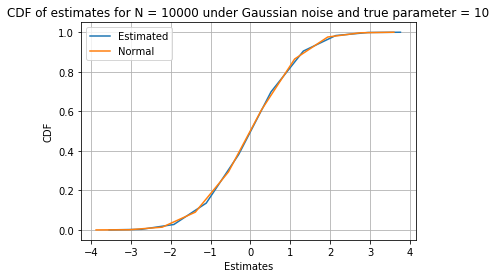

In [14]:
n = 4
fi = 1
rand_samples = (1/(fi**0.5))*np.random.randn(A_trialsG[:,n].shape[0],1)
pdf = np.histogram((N[n]**0.5)*(A_trialsG[:,n]-A))
cdf = np.cumsum(pdf[0])/np.sum(pdf[0])
pdf_g = np.histogram(rand_samples)
cdf_g = np.cumsum(pdf_g[0])/np.sum(pdf_g[0])
plt.plot(pdf[1][1:],cdf,pdf_g[1][1:],cdf_g)
plt.title('CDF of estimates for N = '+str(N[n])+' under Gaussian noise and true parameter = '+str(A))
plt.grid('on')
plt.xlabel('Estimates')
plt.ylabel('CDF')
plt.legend(['Estimated','Normal'])

For Laplacian, Fisher Information I(A) = 2                          

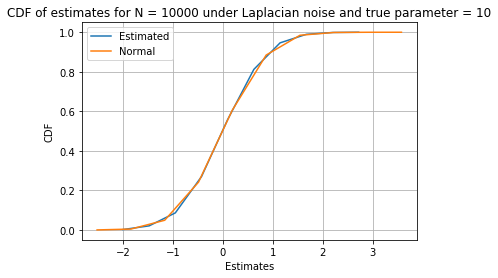

In [15]:
n = 4
fi = 2
rand_samples = (1/(fi**0.5))*np.random.randn(A_trialsL[:,n].shape[0],1)
pdf = np.histogram((N[n]**0.5)*(A_trialsL[:,n]-A))
cdf = np.cumsum(pdf[0])/np.sum(pdf[0])
pdf_g = np.histogram(rand_samples)
cdf_g = np.cumsum(pdf_g[0])/np.sum(pdf_g[0])
plt.plot(pdf[1][1:],cdf,pdf_g[1][1:],cdf_g)
plt.title('CDF of estimates for N = '+str(N[n])+' under Laplacian noise and true parameter = '+str(A))
plt.grid('on')
plt.xlabel('Estimates')
plt.ylabel('CDF')
plt.legend(['Estimated','Normal'])

For Cauchy, I(A) = 1/(2*Gamma^2) = 0.14

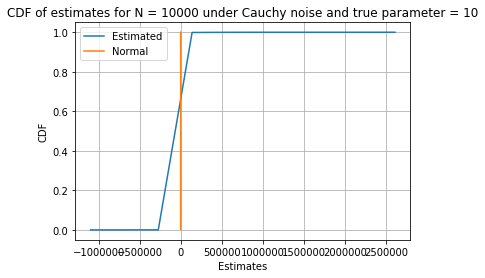

In [16]:
n = 4
fi = 0.14
rand_samples = (1/(fi**0.5))*np.random.randn(A_trialsC[:,n].shape[0],1)
pdf = np.histogram((N[n]**0.5)*(A_trialsC[:,n]-A))
cdf = np.cumsum(pdf[0])/np.sum(pdf[0])
pdf_g = np.histogram(rand_samples)
cdf_g = np.cumsum(pdf_g[0])/np.sum(pdf_g[0])
plt.plot(pdf[1][1:],cdf,pdf_g[1][1:],cdf_g)
plt.title('CDF of estimates for N = '+str(N[n])+' under Cauchy noise and true parameter = '+str(A))
plt.grid('on')
plt.xlabel('Estimates')
plt.ylabel('CDF')
plt.legend(['Estimated','Normal'])

__Q4.__ We will find the PDF of the estimate in the nest few cells.

For Gaussian

Text(0, 0.5, 'PDF')

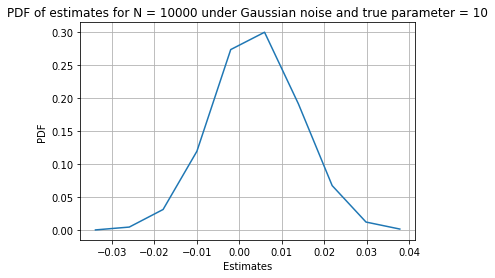

In [20]:
n = 4
hist = np.histogram(A_trialsG[:,n]-A,10)
pdf = hist[0]/np.sum(hist[0])
plt.plot(hist[1][1:],pdf)
plt.title('PDF of estimates for N = '+str(N[n])+' under Gaussian noise and true parameter = '+str(A))
plt.grid('on')
plt.xlabel('Estimates')
plt.ylabel('PDF')

For Laplacian

Text(0, 0.5, 'PDF')

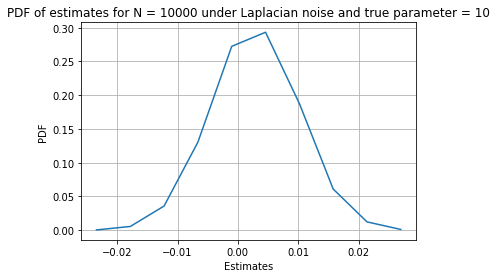

In [21]:
n = 4
hist = np.histogram(A_trialsL[:,n]-A,10)
pdf = hist[0]/np.sum(hist[0])
plt.plot(hist[1][1:],pdf)
plt.title('PDF of estimates for N = '+str(N[n])+' under Laplacian noise and true parameter = '+str(A))
plt.grid('on')
plt.xlabel('Estimates')
plt.ylabel('PDF')

For Cauchy

Text(0, 0.5, 'PDF')

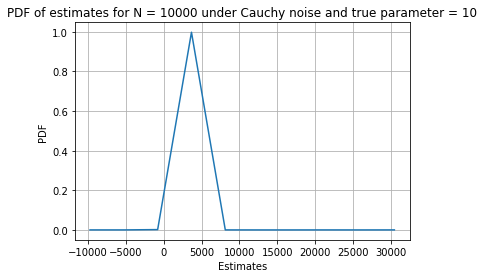

In [22]:
n = 4
hist = np.histogram(A_trialsC[:,n]-A,10)
pdf = hist[0]/np.sum(hist[0])
plt.plot(hist[1][1:],pdf)
plt.title('PDF of estimates for N = '+str(N[n])+' under Cauchy noise and true parameter = '+str(A))
plt.grid('on')
plt.xlabel('Estimates')
plt.ylabel('PDF')

In [17]:
A_trialsC

array([[  63.07174648,    9.89194398,    9.99808   ,   -0.29368176,
          -1.10306563],
       [  -1.18601789,   10.00038723,    4.48496922,  -50.35668541,
          15.26618798],
       [  10.00466054,    4.00696687,   22.95019675,   11.2011415 ,
        -106.8811179 ],
       ...,
       [   7.28995008,    7.0915325 ,    8.53156979,   28.23343171,
          13.32594818],
       [   7.14842983,    9.03926782,   11.61052384,   17.41978455,
          21.25818608],
       [   9.99232484,    9.08797327,    9.99727305,    3.00407422,
           7.7119418 ]])

In [83]:
A_hat = cauchy_est(A,1000,Gamma,True)

Estimated A: 9.990715372983896
0.07307685267971681
